In [711]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime as dt

In [712]:
df=pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [713]:
sns.set_style('darkgrid')
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)
df.dropna(thresh=2,inplace=True)
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DOB'] = df['DOB'].mask(df['DOB'].dt.year > 2001, df['DOB'] - pd.offsets.DateOffset(years=100))
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')


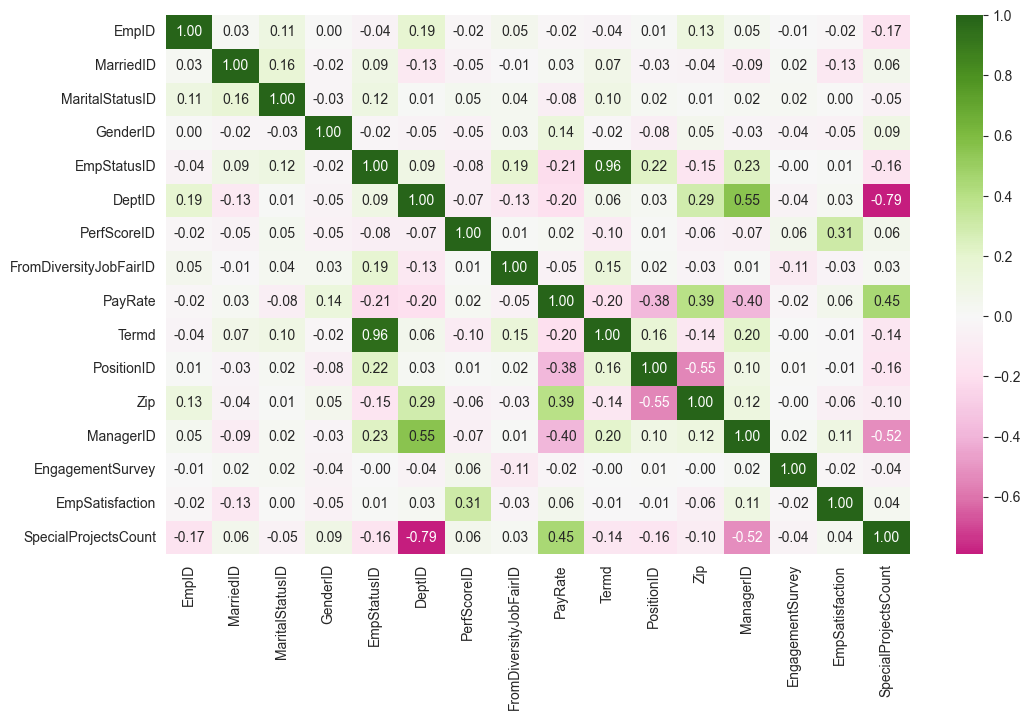

In [714]:

plt.figure(figsize = (12.0,7.0))
sns.heatmap(df.corr(),xticklabels= df.corr().columns.values,yticklabels=df.corr().columns.values, cmap = cm.PiYG, center = 0., annot = True, fmt = '.2f' )
plt.show()


Istnieje ledwozauważalna korelacja między ManagerID a PerformanceScore - -0.07
średnio mi się ten barplot podoba - zrobić jakiś wykres na podstawie tego crosstaba?


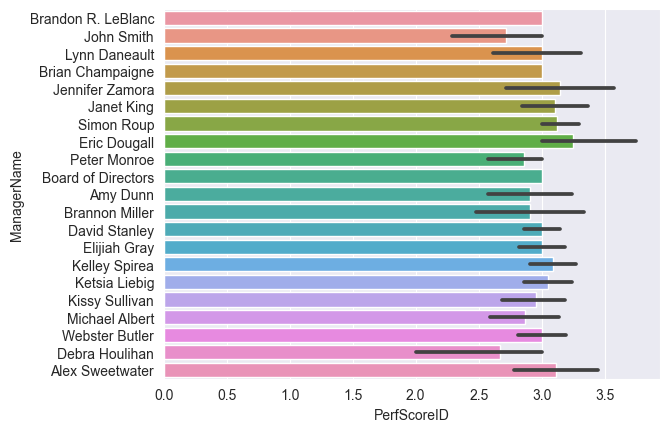

In [715]:
# 1 Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?
print("Istnieje ledwozauważalna korelacja między ManagerID a PerformanceScore - -0.07")
df.columns.to_list()
sns.barplot(y='ManagerName',x='PerfScoreID',data=df)
performance=pd.crosstab(df['ManagerName'],df['PerformanceScore'])
performance
print('średnio mi się ten barplot podoba - zrobić jakiś wykres na podstawie tego crosstaba?')

Najlepiej zatrudniać z następujących źródeł: Website Banner Ads, MBTA Ads i Billboard, jeśli zależy nam na najdłuższym stażu pracowników


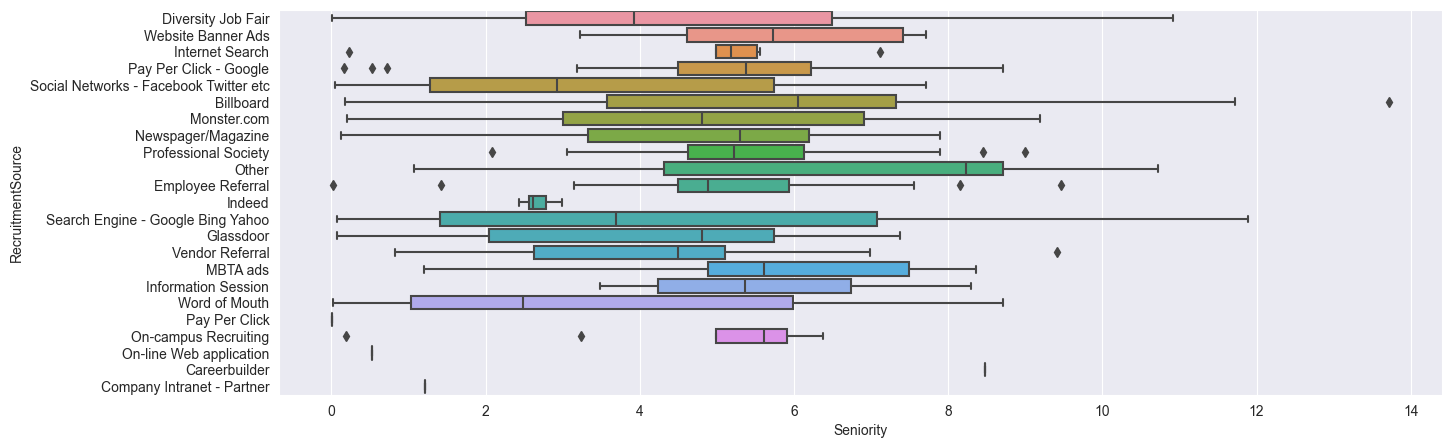

In [716]:
# 2 Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

from statistics import median


def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')

df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

plt.figure(figsize=(15,5))
sns.boxplot(y='RecruitmentSource',x='Seniority',data=df)

print('Najlepiej zatrudniać z następujących źródeł: Website Banner Ads, MBTA Ads i Billboard, jeśli zależy nam na najdłuższym stażu pracowników')


Nie ma korelacji pomiędzy stanem cywilnym a zadowoleniem z pracy


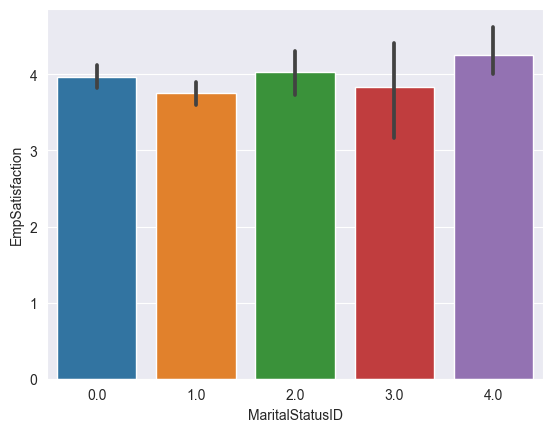

In [717]:
# 3 Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?
df[['MaritalDesc', 'MaritalStatusID']].value_counts()
sns.barplot(y='EmpSatisfaction',x='MaritalStatusID',data=df)
print('Nie ma korelacji pomiędzy stanem cywilnym a zadowoleniem z pracy')


<AxesSubplot:xlabel='Age', ylabel='Count'>

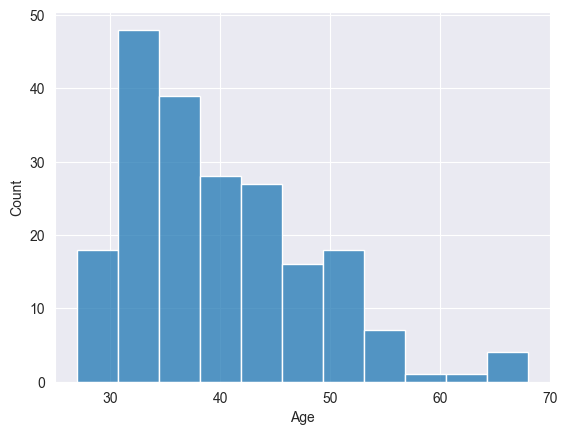

In [718]:
# 4 Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?
agedate= dt.datetime(2019,9,27)
df['Age']=df.apply(lambda x:  (agedate.year - x['DOB'].year), axis=1)
df['Age']
df1=df[df['DateofTermination'].isnull()]
sns.histplot(data=df1, x=df1['Age'])



Najstarsi pracownicy (po 50) nad największą liczbą specjalnych projektów (jest ich co prawda tylko 2), natomiast największa liczba specjalnych projektów jest opracowywana pracowników poniżej 50


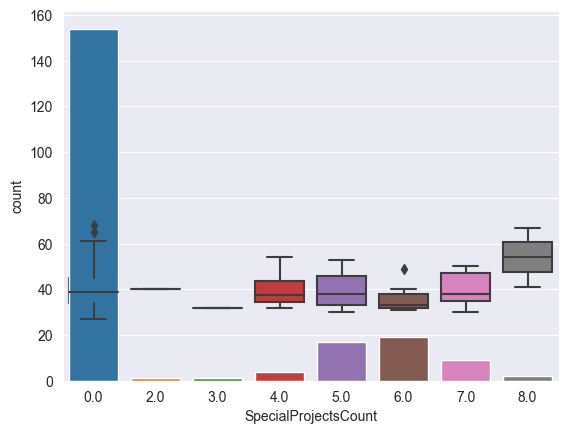

In [719]:
# 5 Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

sns.boxplot(y='Age',x='SpecialProjectsCount',data=df1)
sns.countplot(x='SpecialProjectsCount',data=df1)
print('Najstarsi pracownicy (po 50) nad największą liczbą specjalnych projektów (jest ich co prawda tylko 2), natomiast największa liczba specjalnych projektów jest opracowywana pracowników poniżej 50')

